In [1]:
from seleniumextractor import SeleniumExtractor
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support import expected_conditions as EC
from decimal import *
from selenium_error import *
from configReader_WLNSE import configReader_WLNSE
import random
import logging
import logging.config
import sys
import pandas as pd
import datetime as dt
import time
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
current_date = dt.datetime.today().strftime("%m%d%Y")

In [3]:
def _get_config(property):
    return(configReader_WLNSE.get_setting(property))
    return(configReader_WLNSE.get_setting(property))

marketinout_loginurl = _get_config("login_link")
marketinout_username = _get_config("username")

In [4]:
file_path = "C://Users//Sonam//Downloads//chromedriver_win32" + "//"
wl_file_path = "C://Users//Sonam//OneDrive//Documents//watchlists//usa"+"//"

In [5]:
marketinout_loginurl = _get_config("login_link")
marketinout_username = _get_config("username")
selextractor = SeleniumExtractor(marketinout_loginurl)
elem = selextractor.get_elem_by_id("l")
elem.send_keys(marketinout_username)
elem = selextractor.get_elems_by_class("button")[0].click()

In [6]:
_match_xpath = _get_config("match_xpath")

_1_month = _get_config("1_month")
_1_month_fn = _get_config("1_month_fn")
_3_month = _get_config("3_month")
_3_month_fn = _get_config("3_month_fn")
_6_month = _get_config("6_month")
_6_month_fn = _get_config("6_month_fn")


In [7]:
def get_scanner_details(url,selextractor,csv_file_name):
    selextractor.driver.get(url)
    selextractor.driver.get("https://www.marketinout.com/stock-screener/csv_stocks.csv")
    #insert a wait here for few seconds for the file to be downlaoded
    time.sleep(3)
    df = pd.read_csv("C://Users//Sonam//Downloads//chromedriver_win32" + "//" + csv_file_name,encoding='latin-1')
    return df
    

In [8]:
# def generate_watchlist(wl_url,sel,file_name):
#     df = get_scanner_details(wl_url,sel,file_name)
#     symbol_str = get_watchlist(df)
#     output_file_name = file_name.split('.')[0]
#     write_watchlist(output_file_name,symbol_str)
#     #delete the filename after processing to keep the directory clean
#     os.remove(file_path+file_name)
    
    

In [9]:
def generate_sectorData(wl_url,sel,file_name):
    df = get_scanner_details(wl_url,sel,file_name)
    os.remove(file_path+file_name)
    return df

In [10]:

df2 = generate_sectorData(_3_month,selextractor,_3_month_fn)
df3 = generate_sectorData(_6_month,selextractor,_6_month_fn)
df = generate_sectorData(_1_month,selextractor,_1_month_fn)

In [11]:
df

,Symbol,Name,Industry,Sector,Exchange,Cap mln,Last,Change,Change %,Volume,...,Adr,Adr2,Advol,Percent_float,3_mths_rs,6mths_rs,1_mths_rs,Weekly_ib,3wtc,Weekly_chg
0,AURIONPRO.NS,Aurionpro Solutions Ltd,Software - Infrastructure,Technology,NSE,14890.00,730.00,-24.25,-3.22,262503,...,7.85,38.52,176.10,NaN,99.74,98.93,99.90,0.0,0.0,11.7800
1,REFEX.NS,Refex Industries Ltd,Thermal Coal,Energy,NSE,9431.95,573.50,37.85,7.07,1565079,...,6.72,23.86,269.24,NaN,99.58,99.68,99.79,0.0,0.0,34.4200
2,JAIBALAJI.NS,Jai Balaji Industries Ltd,Steel,Basic Materials,NSE,12001.00,88.00,-0.15,-0.17,462356,...,7.68,5.37,104.12,34.50,98.64,99.04,99.69,0.0,0.0,10.5500
3,SERVOTECH.NS,Servotech Power Systems Ltd,Electrical Equipment & Parts,Industrials,NSE,1546.31,84.45,-4.45,-5.01,415271,...,4.43,2.98,21.10,NaN,99.37,99.73,99.53,0.0,0.0,-5.0100
4,DATAMATICS.NS,Datamatics Global Services Ltd,Information Technology Services,Technology,NSE,29012.00,452.45,-17.25,-3.67,344281,...,6.84,28.69,697.10,22.50,96.81,93.79,99.38,1.0,0.0,-8.0700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,CYIENT.NS,Cyient Ltd,Conglomerates,Industrials,NSE,143720.00,1321.30,-39.05,-2.87,401000,...,4.01,48.57,926.57,63.92,96.28,96.68,81.00,0.0,0.0,1.6600
152,HILTON.NS,Hilton Metal Forging Ltd,Metal Fabrication,Industrials,NSE,3103.80,152.90,1.45,0.96,310108,...,4.91,6.99,16.54,NaN,98.38,98.55,80.90,0.0,0.0,3.4500
153,ARTEMISMED.NS,Artemis Medicare Services Ltd,NaN,NaN,NSE,NaN,84.90,-1.35,-1.57,157751,...,4.47,3.57,20.83,NaN,88.28,78.52,80.54,1.0,0.0,0.7117
154,KEC.NS,KEC International Ltd,Engineering & Construction,Industrials,NSE,138967.00,515.85,-5.80,-1.11,647995,...,6.33,31.14,752.31,58.19,73.00,81.68,80.12,0.0,0.0,-4.4200


In [12]:
df_filtered = df[df['Rs'] > 89 ]
df_filtered2 = df2[df2['Rs'] > 89 ]
df_filtered3 = df3[df3['Rs'] > 89 ]

In [13]:
df_filtered

,Symbol,Name,Industry,Sector,Exchange,Cap mln,Last,Change,Change %,Volume,...,Adr,Adr2,Advol,Percent_float,3_mths_rs,6mths_rs,1_mths_rs,Weekly_ib,3wtc,Weekly_chg
0,AURIONPRO.NS,Aurionpro Solutions Ltd,Software - Infrastructure,Technology,NSE,14890.00,730.00,-24.25,-3.22,262503,...,7.85,38.52,176.10,NaN,99.74,98.93,99.90,0.0,0.0,11.78
1,REFEX.NS,Refex Industries Ltd,Thermal Coal,Energy,NSE,9431.95,573.50,37.85,7.07,1565079,...,6.72,23.86,269.24,NaN,99.58,99.68,99.79,0.0,0.0,34.42
2,JAIBALAJI.NS,Jai Balaji Industries Ltd,Steel,Basic Materials,NSE,12001.00,88.00,-0.15,-0.17,462356,...,7.68,5.37,104.12,34.50,98.64,99.04,99.69,0.0,0.0,10.55
3,SERVOTECH.NS,Servotech Power Systems Ltd,Electrical Equipment & Parts,Industrials,NSE,1546.31,84.45,-4.45,-5.01,415271,...,4.43,2.98,21.10,NaN,99.37,99.73,99.53,0.0,0.0,-5.01
4,DATAMATICS.NS,Datamatics Global Services Ltd,Information Technology Services,Technology,NSE,29012.00,452.45,-17.25,-3.67,344281,...,6.84,28.69,697.10,22.50,96.81,93.79,99.38,1.0,0.0,-8.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,DYCL.NS,Dynamic Cables Ltd,Electrical Equipment & Parts,Industrials,NSE,4205.52,214.10,25.25,13.37,1104949,...,3.97,7.38,20.03,21.72,83.94,86.88,89.44,0.0,0.0,12.98
97,SONAMCLOCK.NS,Sonam Clock Ltd,Furnishings Fixtures & Appliances,Consumer Cyclical,NSE,1060.85,51.75,-2.00,-3.72,24563,...,7.22,3.64,2.56,19.92,71.27,82.49,89.34,0.0,0.0,-10.78
98,RAINBOW.NS,Rainbow Children`s Medicare Ltd,Medical Care Facilities,Healthcare,NSE,92509.00,934.45,23.45,2.57,270348,...,3.53,29.14,165.56,NaN,88.49,71.24,89.23,0.0,0.0,4.29
99,GLENMARK.NS,Glenmark Pharmaceuticals Ltd,Drug Manufacturers - Specialty & Generic,Healthcare,NSE,176157.00,608.55,-0.45,-0.07,1540050,...,2.96,16.85,1265.77,NaN,97.65,94.11,89.18,0.0,0.0,-2.52


C:\Users\Sonam\anaconda3\envs\IBKR_2\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:title={'center':'Sector by 6 Month'}, ylabel='Sector'>

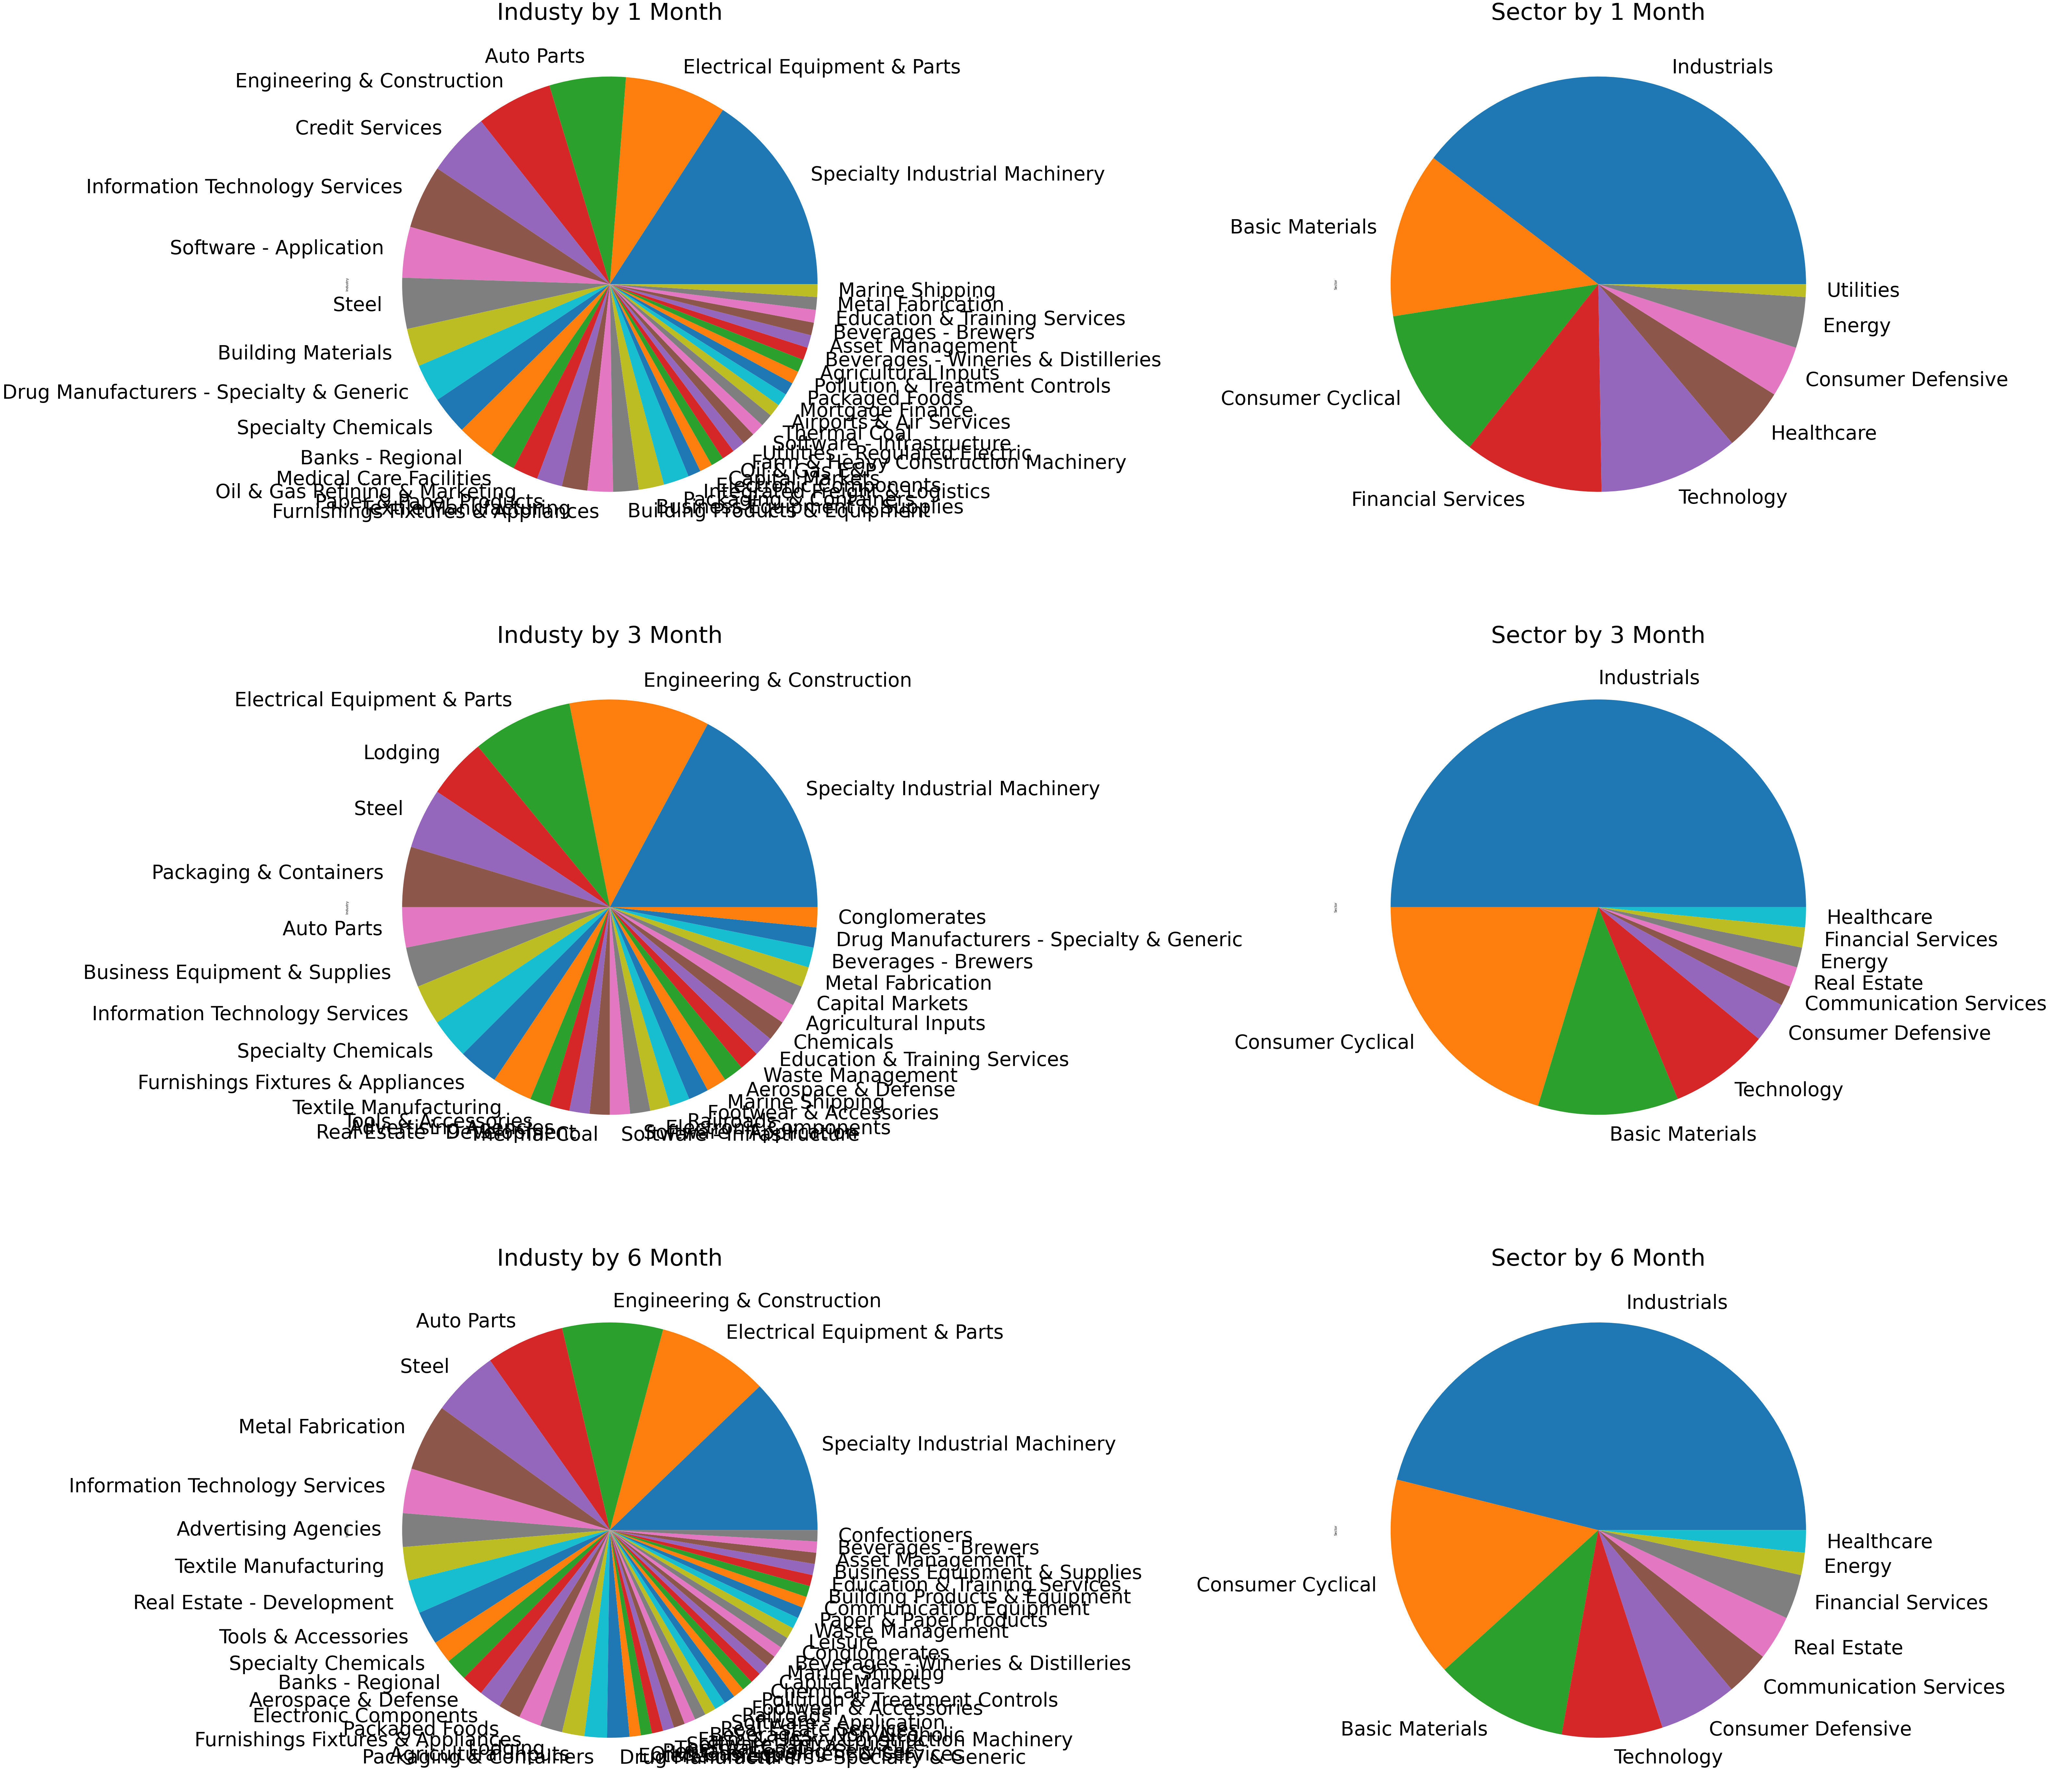

In [14]:
fig, axs = plt.subplots(3,2,figsize=(100, 100))
plt.rc('font', size=60)    
df_filtered['Industry'].value_counts().plot(ax=axs[0,0],kind='pie',title='Industy by 1 Month')
df_filtered['Sector'].value_counts().plot(ax=axs[0,1],kind='pie',title='Sector by 1 Month')
df_filtered2['Industry'].value_counts().plot(ax=axs[1,0],kind='pie',title='Industy by 3 Month')
df_filtered2['Sector'].value_counts().plot(ax=axs[1,1],kind='pie',title='Sector by 3 Month')
df_filtered3['Industry'].value_counts().plot(ax=axs[2,0],kind='pie',title='Industy by 6 Month')
df_filtered3['Sector'].value_counts().plot(ax=axs[2,1],kind='pie',title='Sector by 6 Month')

